In [ ]:
# https://www.techwithtim.net/tutorials/ai-chatbot/
# https://www.techwithtim.net/tutorials/ai-chatbot/part-1/

In [ ]:
! wget https://techwithtim.net/wp-content/uploads/2019/05/json-file.zip
! unzip json-file.zip

--2021-01-04 06:35:38--  https://techwithtim.net/wp-content/uploads/2019/05/json-file.zip
Resolving techwithtim.net (techwithtim.net)... 45.60.98.218, 45.60.22.218
Connecting to techwithtim.net (techwithtim.net)|45.60.98.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/html]
Saving to: ‘json-file.zip’

json-file.zip       100%[===================>]     212  --.-KB/s    in 0s      

2021-01-04 06:35:39 (26.4 MB/s) - ‘json-file.zip’ saved [212/212]

Archive:  json-file.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of json-file.zip or
        json-file.zip.zip, and cannot find json-file.zip.ZIP, period.


In [ ]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

! pip install tflearn

import numpy
import tflearn
import tensorflow
import random

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import json
with open('intents.json') as file:
  data = json.load(file)


print(type(data))
print(len(data))

words = []
labels = []
docs_x = []
docs_y = []

for intent in data['intents']:
  for pattern in intent['patterns']:    
    wrds = nltk.word_tokenize(pattern)
    words.extend(wrds)
    docs_x.append(wrds)
    docs_y.append(intent["tag"])
  if intent['tag'] not in labels:
    labels.append(intent['tag'])

print(words)
print(len(words))
print()
print(labels)
print(len(labels))
print()
print(docs_x)
print(len(docs_x))
print()
print(docs_y)
print(len(docs_y))
print()

In [ ]:
words = [stemmer.stem(w.lower()) for w in words if w != "?"]
print(words)
print(len(words))
print()
words = sorted(list(set(words)))
print(words)
print(len(words))
print()

labels = sorted(labels)
print(labels)
print(len(labels))
print()

In [ ]:
training = []
output = []

out_empty = [0 for _ in range(len(labels))]
print(out_empty)
print()

for x, doc in enumerate(docs_x):
  bag = []
  wrds = [stemmer.stem(w.lower()) for w in doc]
  for w in words:
    if w in wrds:
      bag.append(1)
    else:
      bag.append(0)
  output_row = out_empty[:]  
  output_row[labels.index(docs_y[x])] = 1
  training.append(bag)
  output.append(output_row)

training = numpy.array(training)
output = numpy.array(output)
print(training.shape)
print(output.shape)
print()

import pickle
with open("data.pickle", "wb") as f:
  pickle.dump((words, labels, training, output), f)

[0, 0, 0, 0, 0, 0]

(26, 46)
(26, 6)



In [ ]:
#from tensorflow.keras import backend
#tensorflow.reset_default_graph()
from tensorflow.python.framework import ops
ops.reset_default_graph()

net = tflearn.input_data(shape=[None, len(training[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(output[0]), activation="softmax")
net = tflearn.regression(net)

model = tflearn.DNN(net)

In [ ]:
try:
  model.load("model.tflearn")
except:
  model.fit(training, output, n_epoch=1000, batch_size=8, show_metric=True)
  model.save("model.tflearn")

model.fit(training, output, n_epoch=1000, batch_size=8, show_metric=True)

Training Step: 4999  | total loss: 0.16766 | time: 0.025s
| Adam | epoch: 1000 | loss: 0.16766 - acc: 0.9919 -- iter: 24/26
Training Step: 5000  | total loss: 0.15312 | time: 0.035s
| Adam | epoch: 1000 | loss: 0.15312 - acc: 0.9927 -- iter: 26/26
--


In [ ]:
def bag_of_words(s, words):
  bag = [0 for _ in range(len(words))]

  s_words = nltk.word_tokenize(s)
  s_words = [stemmer.stem(word.lower()) for word in s_words]

  for se in s_words:
    for i, w in enumerate(words):
      if w == se:
        bag[i] = 1
          
  return numpy.array(bag)


def chat():
  print("Start talking with the bot (type quit to stop)!")
  while True:
    inp = input("You: ")
    if inp.lower() == "quit":
      break

    results = model.predict([bag_of_words(inp, words)])
    results_index = numpy.argmax(results)
    tag = labels[results_index]

    for tg in data["intents"]:
      if tg['tag'] == tag:
        responses = tg['responses']

    print(random.choice(responses))

chat()


Start talking with the bot (type quit to stop)!
You: nice to meet you
I am 18 years old!
You: what is your name
You can call me Tim.
You: have you had lunch
I'm Tim aka Tech With Tim.
You: how old are you
18 years young!
You: are you american?
Hello!
You: you are great
Hello!
You: quit


In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(dataset_path)
print(type(dataset_path))


2.4.0
32768/30286 [================================] - 0s 1us/step
/root/.keras/datasets/auto-mpg.data
<class 'str'>


In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print( dataset.head() )
#print( dataset.tail() )

print(type(dataset))
print(dataset.shape)
print()

for col in dataset:
  print(col)

In [ ]:
#print(dataset.isna().sum())
print()
dataset = dataset.dropna()
#print(dataset.isna().sum())
print()

origin = dataset['Origin']
print( type(origin) )
print( len(origin) )
print()

for col in dataset:
  print(col, end=" ")
print()
#origin = dataset.pop('Origin')
for col in dataset:
  print(col, end=" ")
print()

def category(collections):
  ctg = set()
  for i in collections:
    ctg.add(i)
  return ctg

ctg = category(origin)
print(ctg)
print()

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
print( len(train_dataset) )
for col in train_dataset:
  print(col)
print()
sub_set = train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]]
print( len(sub_set) )
for col in sub_set:
  print(col)
print()
print( len(sub_set["MPG"]) )
print( sub_set.head() )

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  return model

print( train_dataset.keys() )

model = build_model()
model.summary()

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print( example_result )

[[-0.13567209]
 [-0.3127199 ]
 [-0.61226416]
 [-0.31106234]
 [-0.18240961]
 [-0.18181778]
 [-0.24357507]
 [-0.54772526]
 [-0.17363127]
 [ 0.03905667]]


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.951586,0.902872,1.951586,9.154783,2.331345,9.154783,995
996,1.936581,0.899411,1.936581,9.088539,2.328177,9.088539,996
997,1.948966,0.876480,1.948966,10.151873,2.459747,10.151873,997
998,2.180131,0.979934,2.180131,9.162653,2.352709,9.162653,998
999,1.844697,0.877748,1.844697,9.486108,2.344347,9.486108,999


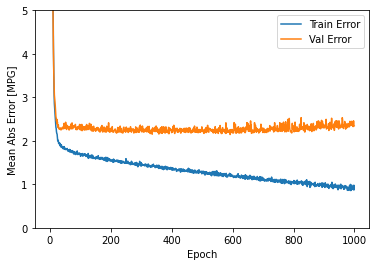

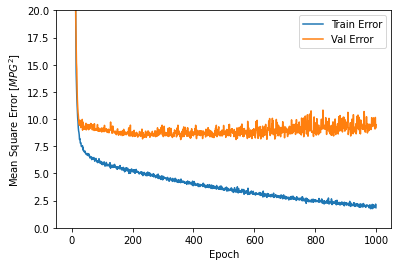

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................

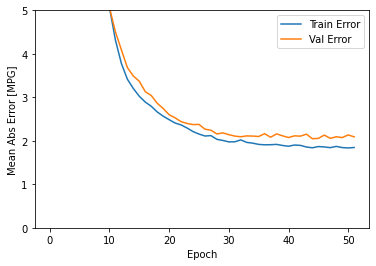

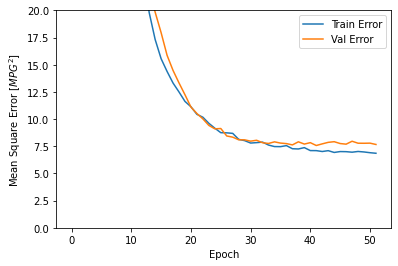

In [ ]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

3/3 - 0s - loss: 5.4233 - mae: 1.7609 - mse: 5.4233
Testing set Mean Abs Error:  1.76 MPG


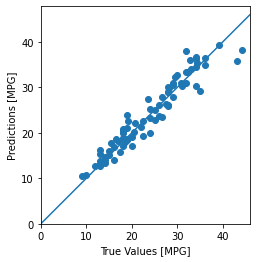

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])




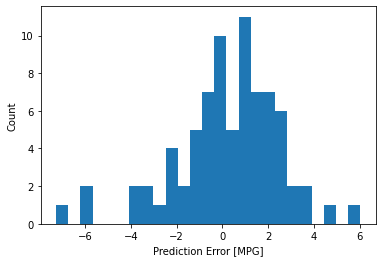

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")